# Cancer data

In [1]:
import matplotlib.pyplot as plt # plotting diagrams
import numpy as np # create arrays
import pandas as pd 
%matplotlib inline

from sklearn.datasets import load_breast_cancer # dataset
from sklearn.decomposition import PCA # to perform pca

In [2]:
cancer = load_breast_cancer()

cancer.keys()

#print(cancer['DESCR'])

# number of attributes = 30 -> means that the dimension of the data is 30

#type(cancer['target']) #numpy.ndarray

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
labels = np.empty(len(cancer['target']), dtype = 'U16')

for i in np.arange(0,len(cancer['target']),1): # for all entries in prog (prognosis column of dataset)
    if cancer['target'][i] == 0:
            labels[i] = 'Benign'
    if cancer['target'][i] != 0:
            labels[i] = 'Malignant'

#print(labels)
labels.dtype

dtype('<U16')

In [4]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) # make a dataframe

df.head(5) # see the first 5 observations

#type(df) #pandas.core.frame.DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA
We want to reduce the dimensionality of the data from 30 to 2 using PCA

The first thing to do with PCA is to scale the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # initialise object (?)
scaler.fit(df) # apply scaler to the dataset

scaled_data = scaler.transform(df)
#scaled_data
type(cancer['target'])

numpy.ndarray

Now we can apply PCA

In [6]:
# create an object called pca
pca = PCA(n_components = 2) # the argument says how many dimensions we want to reduce the data to 

pca.fit(scaled_data)

x_pca = pca.transform(scaled_data) #create an object which is the data that has undergone pca

print(scaled_data.shape) # shape tells you the dimensions of the object before pca
# the original (scaled) data has 569 observations over 30 features (ie rows and columns)

print(x_pca.shape) # the pca transformed data has 569 observations but now only over 2 features! wonderful

(569, 30)
(569, 2)


Plot the data points on a PCA plot

Text(0, 0.5, 'PC2')

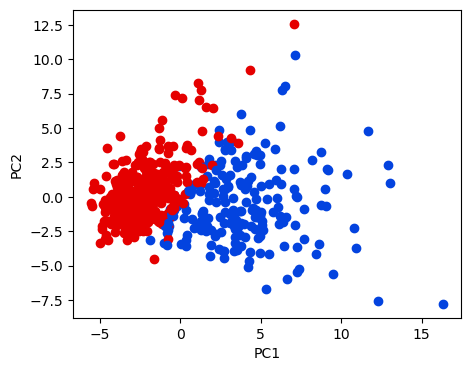

In [7]:
import matplotlib.cm as cm

plt.figure(figsize = (5,4)) # select figure size
#plt.scatter(x_pca[:,0], x_pca[:,1], c = cancer['target'],cmap='Set1')

for i in np.arange(0,len(scaled_data),1):
    if cancer['target'][i] == 0:
        plt.scatter(x_pca[i,0], x_pca[i,1], c = '#0343DF') #blue
    if cancer['target'][i] == 1:
        plt.scatter(x_pca[i,0], x_pca[i,1], c = '#E50000') #red


plt.xlabel('PC1')
plt.ylabel('PC2')

In [8]:
len(x_pca)

569

# GP-LVM

In [9]:
import GPy

np.random.seed(2809)

type(scaled_data)

numpy.ndarray

### Using linear kernel - equivalent to PCA

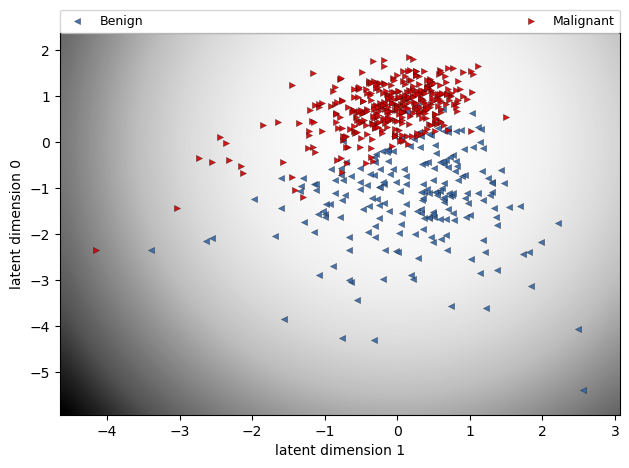

In [10]:
# latent dimension = q
q = 2

#cancer gplvm
c_gplvm1 = GPy.models.GPLVM(scaled_data, q, kernel = GPy.kern.Linear(q))

#c_gplvm
c_gplvm1.optimize(messages=0)

c_gplvm1.plot_latent(labels = labels) # for class0-class1 labels, (labels = cancer['target'])
plt.show()

### Using RBF kernel

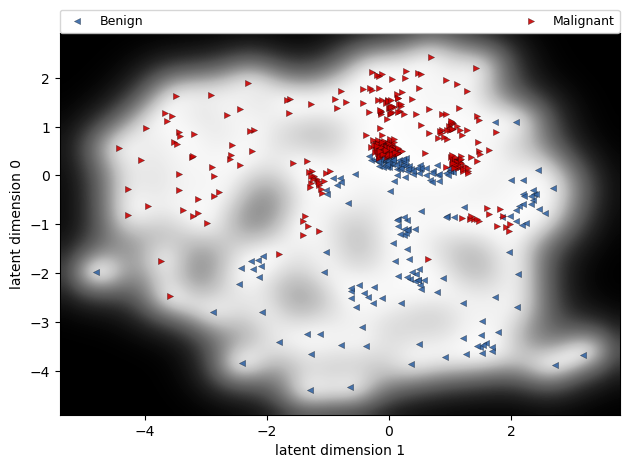

In [11]:
# latent dimension = q
q = 2

#cancer gplvm
c_gplvm2 = GPy.models.GPLVM(scaled_data, q, kernel = GPy.kern.RBF(q))


c_gplvm2.optimize(messages=0)

c_gplvm2.plot_latent(labels = labels)
plt.show()

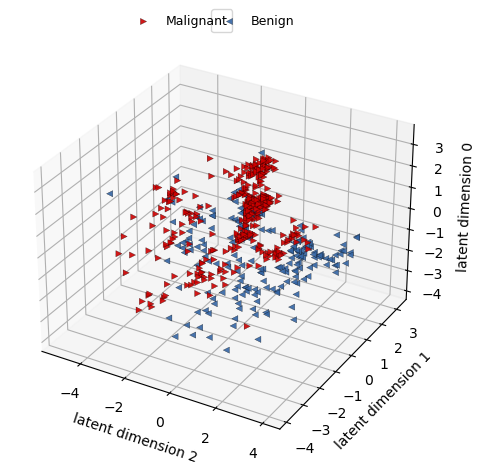

In [12]:
# latent dimension = 3

#cancer gplvm
c_gplvm3 = GPy.models.GPLVM(scaled_data, 3, kernel = GPy.kern.RBF(3))


c_gplvm3.optimize(messages=0)

c_gplvm3.plot_scatter(projection = '3d', labels = labels)
plt.show()

### Put latent dimension coordinates into an array

In [13]:
coords1 = np.empty((len(c_gplvm1.X), q))

for i in np.arange(0,len(c_gplvm1.X),1): # i is observation index
    for j in np.arange(0,q,1): # j is dimension index
        coords1[i,j] = c_gplvm1.X[i][j] 


In [14]:
#coords[:,0] # all observations, x axis
coords1[0:5,:] # first 5 observations, both latent dim coordinates

array([[-3.03601724, -0.64293594],
       [-0.78859307,  1.24331011],
       [-1.89367094,  0.35475412],
       [-2.35241951, -3.39043567],
       [-1.29966899,  0.64276717]])

In [15]:
c_gplvm1.X

index,GPLVM.latent_mean,constraints,priors
[0 0],-3.03601724,,
[0 1],-0.64293594,,
[1 0],-0.78859307,,
[1 1],1.24331011,,
[2 0],-1.89367094,,
[2 1],0.35475412,,
[3 0],-2.35241951,,
[3 1],-3.39043567,,
[4 0],-1.29966899,,
[4 1],0.64276717,,


## kNN classification error

In [16]:
#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### For linear kernel

In [17]:
res = train_test_split(coords1, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [18]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)
print("Predictions from the classifier:")
print(predicted[:5])
print("Target values:")
print(test_labels[:5])

score1 = accuracy_score(predicted, test_labels)

Predictions from the classifier:
['Benign' 'Benign' 'Malignant' 'Benign' 'Benign']
Target values:
['Malignant' 'Benign' 'Malignant' 'Benign' 'Benign']


 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


### For RBF kernel

In [19]:
coords2 = np.empty((len(c_gplvm2.X), q))

for i in np.arange(0,len(c_gplvm2.X),1): # i is observation index
    for j in np.arange(0,q,1): # j is dimension index
        coords2[i,j] = c_gplvm2.X[i][j] 


In [20]:
coords3 = np.empty((len(c_gplvm3.X), 3))

for i in np.arange(0,len(c_gplvm3.X),1): # i is observation index
    for j in np.arange(0,3,1): # j is dimension index
        coords3[i,j] = c_gplvm3.X[i][j] 

In [21]:
res = train_test_split(coords2, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [22]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

score2 = accuracy_score(predicted, test_labels)

Predictions from the classifier:
['Benign' 'Benign' 'Malignant' 'Benign' 'Malignant']
Target values:
['Malignant' 'Benign' 'Malignant' 'Benign' 'Benign']


 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [23]:
res = train_test_split(coords3, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [24]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

score3 = accuracy_score(predicted, test_labels)

Predictions from the classifier:
['Benign' 'Benign' 'Malignant' 'Benign' 'Malignant']
Target values:
['Malignant' 'Benign' 'Malignant' 'Benign' 'Benign']


 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [25]:
print("kNN accuracy for Linear kernel: ", score1)
print("kNN accuracy for RBF kernel: ", score2)
print("kNN accuracy for 3-d RBF kernel: ", score3)

kNN accuracy for Linear kernel:  0.956140350877193
kNN accuracy for RBF kernel:  0.9210526315789473
kNN accuracy for 3-d RBF kernel:  0.9035087719298246


### log likelihood

In [26]:
print("Log-likelihood for Linear kernel:", c_gplvm1.log_likelihood())
print('------------------------------------------------------------------------')
print("Log-likelihood for RBF kernel:", c_gplvm2.log_likelihood())
print('------------------------------------------------------------------------')
print("Log-likelihood for 3-d RBF kernel:", c_gplvm3.log_likelihood())
print('------------------------------------------------------------------------')

Log-likelihood for Linear kernel: -15892.18337051693
------------------------------------------------------------------------
Log-likelihood for RBF kernel: -10462.400967231077
------------------------------------------------------------------------
Log-likelihood for 3-d RBF kernel: -6842.9871940771445
------------------------------------------------------------------------
